In [6]:
# Import packages
import matplotlib.pyplot as plt 
import seaborn as sns 
colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background')

import pandas as pd 
import numpy as np

# Import Tensorflow
import tensorflow as tf
import keras as keras

# Random data points
[x, y] = [[1, 2, 3, 4, 5, 4, 5, 10, 3, 2, 8, 7] , [3, 12, 10, 10, 20, 20, 15, 20, 7, 6, 18, 16]] 

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Reshape input data to (n_samples, n_features)
x = x.reshape((-1, 1))

# Model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')

### Model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(x, y, epochs=10, verbose=0) 

hist = pd.DataFrame(history.history) 
# hist['epoch'] = history.epoch #wird nicht gebraucht unbedingt
hist.head()

2023-10-03 16:03:49.951505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,loss
0,12.0
1,12.0
2,12.0
3,12.0
4,12.0


In [7]:
### Model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(x, y, epochs=10, verbose=0)

hist = pd.DataFrame(history.history) 
# hist['epoch'] = history.epoch #wird nicht gebraucht unbedingt
hist.head()

2023-10-03 16:03:50.088257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,loss
0,12.0
1,12.0
2,12.0
3,12.0
4,12.0


In [8]:
import numpy as np

### ADD Correct Regression 

x_values, y_values = x, y

### Sxx bzw. Syy berechnen 
def CalcSxx (liste): 
    ### Mittelwert berechnen von X-Werten
    i_ = sum(liste)/len(liste) 
    ### Tabelle um Regressionsgerade zu berechnen
    columns = ['x', 'x-x_', '(x-x_)^2'] 
    table = [] 

    for i in liste: 
        # print('Für x = {} und x - x_ = {} gilt die quadratische Abweichung: {}'.format(i, i-i_, (i - i_)**2)
        table.append([i, i-i_,(i - i_)**2]) 

    np_array = np.array(table) # aus liste machen wir array 
    df = pd.DataFrame(np_array, columns=columns) 
    Sxx = sum(df['(x-x_)^2']) 
    return i_, Sxx, df # Weird hier scheint die Reihenfolge wichtig zu sein 

### Print Sxx / Syy ###
x_, Sxx, df_x = CalcSxx(x_values) 
fuck, Syy, df_y = CalcSxx(y_values) 
print('Sxx = {}'.format(Sxx)) 
print('Syy = {}'.format(Syy)) 

### Sxy berechnen
df2 = pd.concat([df_x['x-x_'], df_y['x-x_']], axis=1)
df2.columns=['x-x_', 'y-y_'] # rename columns
df2['Values'] = df2['x-x_'] * df2['y-y_'] # mnultiply rows
Sxy = sum(df2['Values']) 

### Print Sxy ###
print('Sxy = {}\n'.format(Sxy)) 
### ------------------- ###

### Berechnung der Geraden
M = Sxy / Sxx ; B = fuck - M * x_ 

def linear_gradient (X): 
    y=M*float(X)+B 
    return y 

### MEAN SQUARE ERROR ### mse = 1/n * (y_ - y)**2 # Jeder Datenpunkt wird durchgegangen y_ - y
MSE = 0 
for i in range(0,len(x_values)): 
    #print('Y-Wert real = {} and forecast = {}'.format(y_values[i], linear_gradient(x_values[i])))
    MSE=MSE+1/len(x_values)*((linear_gradient(x_values[i])-y_values[i]))**2 
print('MSE = {}'.format(MSE)) 

### PLOTTEN ### 
x_regression = [] ; y_regression_correct = [] 
for i in range(0,len(x_values)): 
    y_regression_correct.append(linear_gradient(x_values[i])) 

colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background') # for customizing theme
plt.plot(x_values, y_values, 'o', label="Original Data") 
plt.plot(x_values, y_regression_correct, label="Regression Curve") 



ValueError: Must pass 2-d input. shape=(12, 3, 1)

2023-10-03 16:01:10.960881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


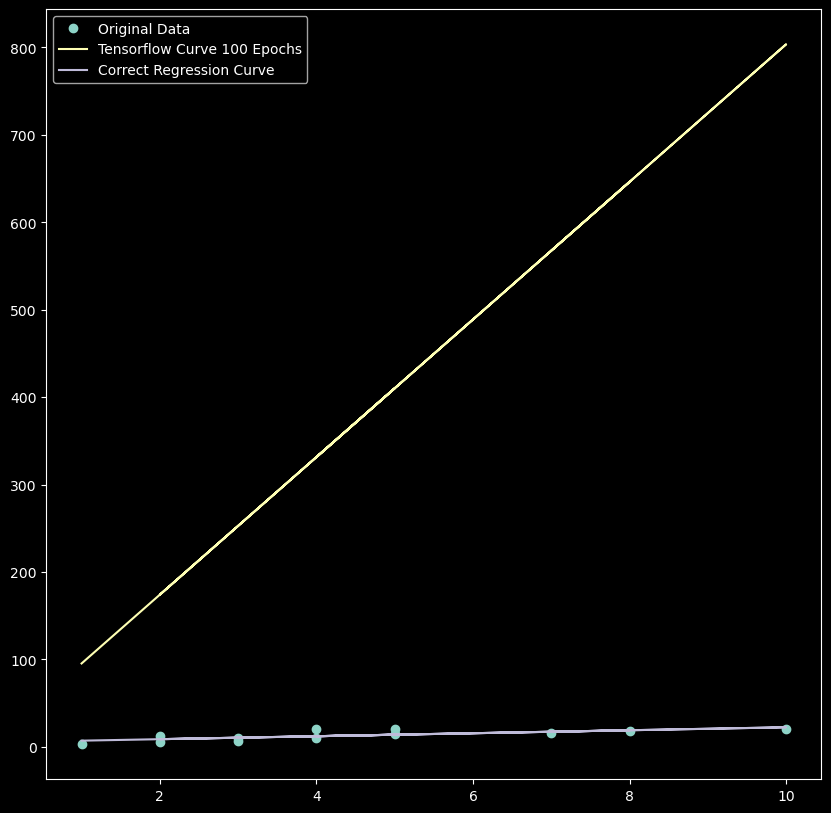

In [ ]:

y_tensorflow = model.predict(x) 

### PLOTTEN ### 
fig = plt.figure(figsize=(10, 10)) # width, height
plt.plot(x, y, 'o', label="Original Data")  
# plt.plot(x, y_regression, label="Regression Curve 100 Epochs")

plt.plot(x, y_tensorflow, label='Tensorflow Curve 100 Epochs')

plt.plot(x_values, y_regression_correct, label="Correct Regression Curve") 

plt.legend()
plt.show() 